<a href="https://colab.research.google.com/github/rvjh/MyWays_FashionMNIST_rohan/blob/master/Fashion_MNIST_RD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model
import operator
import pandas as pd

train_df=pd.read_csv('/content/fashion-mnist_train_cleaned.csv')
test_df=pd.read_csv('/content/fashion-mnist_test_cleaned.csv')

In [ ]:
df = train_df.copy()
df_test = test_df.copy()

In [ ]:
#df.head()
df_test.head()

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,...,242.0,245.0,224.0,245.0,234.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,69.0,94.0,123.0,127.0,138.0,138.0,142.0,145.0,135.0,125.0,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,248.0,238.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,233.0,155.0,0.0,65.0,235.0,216.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,...,0.0,0.0,0.0,0.0,0.0,0.0,87.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,50.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,...,255.0,255.0,254.0,252.0,255.0,101.0,196.0,254.0,252.0,100.0,0.0,0.0,0.0,0.0,0.0,168.0,232.0,225.0,0.0,41.0,172.0,147.0,148.0,153.0,155.0,146.0,137.0,141.0,143.0,137.0,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,69.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=df.drop('Unnamed: 0',1)
df_test=df_test.drop('Unnamed: 0',1)

In [ ]:
print('Train: ', df.shape)
print('Test: ', df_test.shape)

Train:  (3275, 785)
Test:  (3277, 785)


In [ ]:
#df.label.unique()
df_test.label.unique()

array([0, 1, 2, 3])

In [ ]:
#df.isnull().any().sum()
df_test.isnull().any().sum()

0

In [ ]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress'}

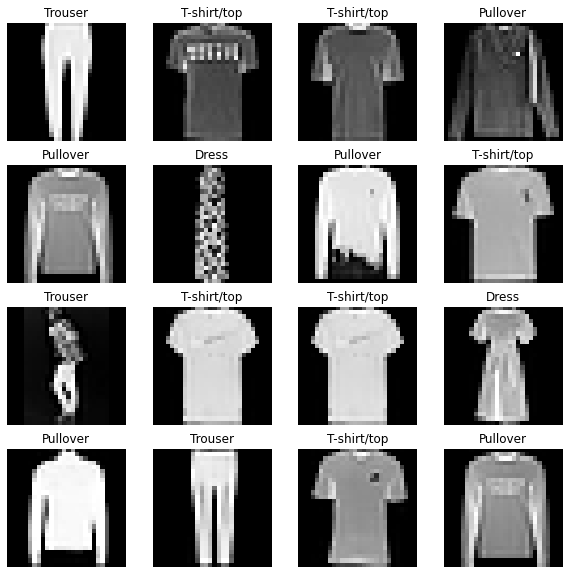

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize = (10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(100)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [ ]:
#df['label'].value_counts()
df_test['label'].value_counts()

3    1000
1    1000
2    1000
0    1000
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


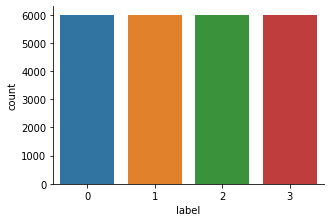

In [ ]:
import seaborn as sns
sns.factorplot(x='label', data=df, kind='count', size=3, aspect= 1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


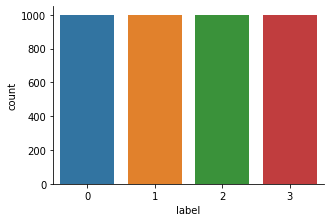

In [ ]:
sns.factorplot(x='label', data=df_test, kind='count', size=3, aspect= 1.5)

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(16800, 784) (7200, 784) (16800,) (7200,)


Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('\nCalculating based on train data ')
acc = clf.score(x_test,y_test)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)


Calculating based on train data 


In [ ]:
print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Classifier Accuracy:  0.9395833333333333

Predicted Values:  [1 1 2 ... 1 3 1]

Accuracy of Classifier on Validation Images:  0.9395833333333333

Confusion Matrix: 
 [[1712    8   64   63]
 [   2 1763    7   16]
 [  68    3 1643   29]
 [  98   21   56 1647]]


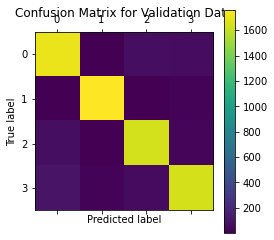

In [ ]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print('\nCalculating based on train data ')
acc2 = clf.score(x_test,y_test)
y_pred2 = clf.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)
conf_mat2 = confusion_matrix(y_test,y_pred2)


Calculating based on train data 


In [ ]:
print('\nxgboost Trained Classifier Accuracy: ',acc2)
print('\nPredicted Values: ',y_pred2)
print('\nAccuracy of Classifier on Validation Images: ',accuracy2)
print('\nConfusion Matrix: \n',conf_mat2)


xgboost Trained Classifier Accuracy:  0.9395833333333333

Predicted Values:  [1 1 2 ... 1 3 1]

Accuracy of Classifier on Validation Images:  0.9395833333333333

Confusion Matrix: 
 [[1712    8   64   63]
 [   2 1763    7   16]
 [  68    3 1643   29]
 [  98   21   56 1647]]


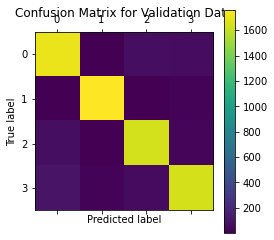

In [ ]:
plt.matshow(conf_mat2)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

k-Nearest Neighbor classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
print('\nCalculating based on train data ')
acc1 = clf.score(x_test,y_test)
y_pred1 = clf.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred1)
conf_mat1 = confusion_matrix(y_test,y_pred1)


Calculating based on train data 


In [ ]:
print('\nSVM Trained Classifier Accuracy: ',acc1)
print('\nPredicted Values: ',y_pred1)
print('\nAccuracy of Classifier on Validation Images: ',accuracy1)
print('\nConfusion Matrix: \n',conf_mat1)


SVM Trained Classifier Accuracy:  0.9395833333333333

Predicted Values:  [1 1 2 ... 1 3 1]

Accuracy of Classifier on Validation Images:  0.9395833333333333

Confusion Matrix: 
 [[1712    8   64   63]
 [   2 1763    7   16]
 [  68    3 1643   29]
 [  98   21   56 1647]]


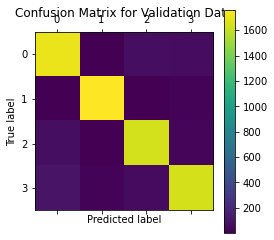

In [ ]:
plt.matshow(conf_mat1)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

For Neural Network

In [116]:
from keras import models
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,Flatten
from keras import layers
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model
from keras.losses import categorical_crossentropy
import operator
import pandas as pd

X1= pd.read_csv('/content/fashion-mnist_train_cleaned.csv')
Y1=pd.read_csv('/content/fashion-mnist_test_cleaned.csv') 

In [117]:
# droping the unnamed col
X1=X1.drop('Unnamed: 0',1)
Y1=Y1.drop('Unnamed: 0',1)

In [118]:
# creating out the feature and class variable

train_x=X1.iloc[:,1:]
train_y=X1.iloc[:,0]
test_x=Y1.iloc[:,1:]
test_y=Y1.iloc[:,0]

In [119]:
#reshaping
def shape(arr):
    x = np.reshape(arr, (len(arr), 784))
    return x
#here by passing the model you will get loss and accuracy 
def eve(x):
  loss, accuracy = x.evaluate(val_x, val_y)
  print(f"Loss = {loss*100:.2f} %")
  print(f"Accuracy = {accuracy*100:.2f} %")
  pred = x.predict(val_x)
  predicted = np.argmax(pred, axis=1)
  report = classification_report(np.argmax(val_y, axis=1), predicted)
  print(report)
  print('roc_aoc :',roc_auc_score(val_y,pred))

def pic():
  #Plot loss results for training data and testing data 
  plt.plot(history_NN3_50.history['loss'], 'blue')
  plt.plot(history_NN3_50.history['val_loss'], 'orange')
  plt.title('Model loss for the NN-3')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validate'], loc='upper left')
  
  

#Training Data
train_x_reshaped = shape(train_x).astype('float32')/255
train_y = to_categorical(train_y)
train_y = train_y.astype('float32')

#test data
test_x_reshaped = shape(test_x).astype('float32')/255
test_y = to_categorical(test_y)
test_y = test_y.astype('float32')

#take out validation data, 20% 
partial_train_x = train_x_reshaped[:int(len(train_x_reshaped)*0.80)]
partial_train_y = train_y[:int(len(train_y)*0.80)]

val_x = train_x_reshaped[int(len(train_x_reshaped)*0.80):]
val_y = train_y[int(len(train_y)*0.80):]

Implement training and inference pipeline for 2-layer Neural Network 

In [120]:
#taking 2 hidden layer with activation function as relu

def cre_model():
  model=keras.Sequential([
  keras.layers.Dense(64,input_shape=(28*28,)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(4,activation='sigmoid')])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [121]:
#creating mod1 and fitting with the validate data 
#in this case we are getting higher accuracy 
mod1=cre_model()

In [122]:
a1=mod1.fit(partial_train_x,partial_train_y,epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 0.3508 - accuracy: 0.8861
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1873 - accuracy: 0.9381
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1580 - accuracy: 0.9456
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1391 - accuracy: 0.9528
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.9570
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.9578
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1105 - accuracy: 0.9599
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9651
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9639
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9668

In [123]:
eve(mod1)

150/150 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9554
Loss = 20.00 %
Accuracy = 95.54 %
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1190
           1       0.98      0.99      0.98      1203
           2       0.95      0.97      0.96      1218
           3       0.94      0.95      0.94      1189

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

roc_aoc : 0.9841520648368229


In [124]:
# cross validate by changing the activation functions 
def cre_model1():
  model=keras.Sequential([
  keras.layers.Dense(64,input_shape=(28*28,)),
  keras.layers.Dense(128,activation='sigmoid'),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(4,activation='tanh')])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

def cre_model2():
  model=keras.Sequential([
  keras.layers.Dense(64,input_shape=(28*28,)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(128,activation='sigmoid'),
  keras.layers.Dense(4,activation='tanh')])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [125]:
mod2=cre_model1()
mod3=cre_model2()

In [126]:
mod2.fit(partial_train_x,partial_train_y,epochs=10)

#so for changing activation function to  accuracy getting reduced

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 7.9363 - accuracy: 0.2492
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0540 - accuracy: 0.2496
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 8.1066 - accuracy: 0.2482
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0235 - accuracy: 0.2485
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 7.9356 - accuracy: 0.2470
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 7.9999 - accuracy: 0.2484
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 8.1676 - accuracy: 0.2532
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 7.9996 - accuracy: 0.2454
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0436 - accuracy: 0.2495
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0834 - accuracy: 0.2498

In [127]:
eve(mod2)

150/150 [==============================] - 0s 1ms/step - loss: 8.0355 - accuracy: 0.2479
Loss = 803.55 %
Accuracy = 24.79 %
              precision    recall  f1-score   support

           0       0.25      1.00      0.40      1190
           1       0.00      0.00      0.00      1203
           2       0.00      0.00      0.00      1218
           3       0.00      0.00      0.00      1189

    accuracy                           0.25      4800
   macro avg       0.06      0.25      0.10      4800
weighted avg       0.06      0.25      0.10      4800

roc_aoc : 0.4509495100515141


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
mod3.fit(partial_train_x,partial_train_y,epochs=10)
# for this case also accuracy decreasing


Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 7.7895 - accuracy: 0.2594
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0237 - accuracy: 0.2457
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 8.1212 - accuracy: 0.2561
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0877 - accuracy: 0.2535
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 7.9904 - accuracy: 0.2516
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0095 - accuracy: 0.2506
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 8.1447 - accuracy: 0.2540
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0020 - accuracy: 0.2504
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0880 - accuracy: 0.2523
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 8.1099 - accuracy: 0.2540

In [129]:
eve(mod3)

150/150 [==============================] - 0s 1ms/step - loss: 8.0355 - accuracy: 0.2479
Loss = 803.55 %
Accuracy = 24.79 %
              precision    recall  f1-score   support

           0       0.25      1.00      0.40      1190
           1       0.00      0.00      0.00      1203
           2       0.00      0.00      0.00      1218
           3       0.00      0.00      0.00      1189

    accuracy                           0.25      4800
   macro avg       0.06      0.25      0.10      4800
weighted avg       0.06      0.25      0.10      4800

roc_aoc : 0.5608349498572163


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Experiment with Architecture

In [130]:
# increasing no of layers

def create_model():
  model=keras.Sequential([
  keras.layers.Dense(64,input_shape=(28*28,)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(4,activation='sigmoid')])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [131]:
model1=create_model()

In [132]:
# by increasing no  of layers and using relu as hiddel layers activation fun accuracy getting increased 
model1.fit(partial_train_x,partial_train_y,epochs=10)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3938 - accuracy: 0.8649
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1852 - accuracy: 0.9369
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1772 - accuracy: 0.9403
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.9484
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.9546
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1283 - accuracy: 0.9562
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1130 - accuracy: 0.9606
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1108 - accuracy: 0.9611
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9625
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9645

In [133]:
eve(model1)

150/150 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9569
Loss = 14.30 %
Accuracy = 95.69 %
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1190
           1       0.99      0.98      0.99      1203
           2       0.97      0.95      0.96      1218
           3       0.93      0.95      0.94      1189

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

roc_aoc : 0.9922983876694461


In [134]:
#cross validating 
def create_model1():
  model=keras.Sequential([
  keras.layers.Dense(64,input_shape=(28*28,)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(128,activation='sigmoid'),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(64,activation='sigmoid'),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(4,activation='tanh')])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [135]:
model2=create_model1()

In [136]:
# here accuracy decreasing 
model2.fit(partial_train_x,partial_train_y,epochs=10)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 8.0624 - accuracy: 0.2499
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 7.9998 - accuracy: 0.2571
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0973 - accuracy: 0.2510
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0127 - accuracy: 0.2504
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0428 - accuracy: 0.2487
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0120 - accuracy: 0.2510
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 8.0009 - accuracy: 0.2522
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 8.1075 - accuracy: 0.2461
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 8.1415 - accuracy: 0.2493
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 8.1071 - accuracy: 0.2435

In [137]:
eve(model2)

150/150 [==============================] - 0s 2ms/step - loss: 8.0355 - accuracy: 0.2537
Loss = 803.55 %
Accuracy = 25.37 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1190
           1       0.00      0.00      0.00      1203
           2       0.25      1.00      0.40      1218
           3       0.00      0.00      0.00      1189

    accuracy                           0.25      4800
   macro avg       0.06      0.25      0.10      4800
weighted avg       0.06      0.25      0.10      4800

roc_aoc : 0.45717610279885657


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dropout

In [138]:
#with 2 hidden layer adding two 30% dropout layers
def dro_model():
  model=keras.Sequential([
  keras.layers.Dense(64,input_shape=(28*28,)),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(128,activation='relu'),
  layers.Dropout(0.3),
  keras.layers.Dense(128,activation='relu'),
  #layers.Dropout(0.3),
  keras.layers.Dense(4,activation='sigmoid')])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [139]:
model3=dro_model()

In [140]:
# accuracy increasing in case of using dropout
model3.fit(partial_train_x,partial_train_y,epochs=10)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.4314 - accuracy: 0.8474
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2343 - accuracy: 0.9236
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.9326
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1883 - accuracy: 0.9375
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1811 - accuracy: 0.9379
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1808 - accuracy: 0.9375
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1599 - accuracy: 0.9430
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.9460
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1494 - accuracy: 0.9495
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1511 - accuracy: 0.9455

In [141]:
eve(model3)

150/150 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 0.9475
Loss = 16.17 %
Accuracy = 94.75 %
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1190
           1       0.99      0.97      0.98      1203
           2       0.95      0.96      0.95      1218
           3       0.94      0.90      0.92      1189

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800

roc_aoc : 0.9832814883298201


Batch Normalisation

In [142]:
#Adding BatchNormalization layer before each Dense layer
def ba_model():
  model=keras.Sequential([
  keras.layers.BatchNormalization(),
  keras.layers.Dense(64,input_shape=(28*28,)),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(128,activation='sigmoid'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(4,activation='sigmoid')])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [144]:
model4=ba_model()

In [145]:
!mkdir training_1

mkdir: cannot create directory ‘training_1’: File exists


In [146]:
import os
checkpoint_path = "training_1/weights.best.hdf5"
filepath = os.path.dirname(checkpoint_path)

In [147]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [152]:
# in case of batch normalization in every possible way the loss getting decreased and accuracies are improved 
model4.fit(partial_train_x,partial_train_y,epochs=25,steps_per_epoch=5,callbacks=callbacks_list)


Epoch 1/25
5/5 [==============================] - 0s 97ms/step - loss: 0.0864 - accuracy: 0.9722

Epoch 00001: accuracy improved from 0.97115 to 0.97224, saving model to training_1
INFO:tensorflow:Assets written to: training_1/assets
Epoch 2/25
5/5 [==============================] - 0s 96ms/step - loss: 0.0841 - accuracy: 0.9732

Epoch 00002: accuracy improved from 0.97224 to 0.97318, saving model to training_1
INFO:tensorflow:Assets written to: training_1/assets
Epoch 3/25
5/5 [==============================] - 0s 96ms/step - loss: 0.0811 - accuracy: 0.9750

Epoch 00003: accuracy improved from 0.97318 to 0.97500, saving model to training_1
INFO:tensorflow:Assets written to: training_1/assets
Epoch 4/25
5/5 [==============================] - 0s 83ms/step - loss: 0.0788 - accuracy: 0.9758

Epoch 00004: accuracy improved from 0.97500 to 0.97583, saving model to training_1
INFO:tensorflow:Assets written to: training_1/assets
Epoch 5/25
5/5 [==============================] - 0s 94ms/step -

In [149]:
os.listdir(filepath)

['assets', 'saved_model.pb', 'variables']

In [150]:
model4.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_32 (Batc (None, 784)               3136      
_________________________________________________________________
dense_126 (Dense)            (None, 64)                50240     
_________________________________________________________________
batch_normalization_33 (Batc (None, 64)                256       
_________________________________________________________________
dense_127 (Dense)            (None, 128)               8320      
_________________________________________________________________
batch_normalization_34 (Batc (None, 128)               512       
_________________________________________________________________
dense_128 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_35 (Batc (None, 128)             

In [151]:
eve(model4)

150/150 [==============================] - 0s 1ms/step - loss: 0.7422 - accuracy: 0.9150
Loss = 74.22 %
Accuracy = 91.50 %
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1190
           1       0.99      0.93      0.96      1203
           2       0.95      0.88      0.92      1218
           3       0.88      0.90      0.89      1189

    accuracy                           0.92      4800
   macro avg       0.92      0.92      0.92      4800
weighted avg       0.92      0.92      0.92      4800

roc_aoc : 0.9819731050280207


In [ ]:
print(model4.history.history.keys())

dict_keys([])
